In [39]:
# Step 1: Load dataset, split into training and test sets, and scale features
import numpy as np
from sklearn.datasets import load_boston

# load boston housing price dataset
boston = load_boston()
x = boston.data
y = boston.target

# split into training and test sets, namely 80 percent of examples goes for the training, 20 percent goes for the test set
N_train = int(0.8 * x.shape[0])
x_train = x[:N_train,:]
y_train = y[:N_train]
x_test = x[N_train:,:]
y_test = y[N_train:]

# scale features by removing mean and dividing by the standard deviation
x_mean = np.mean(x_train, axis=0)
x_std = np.std(x_train, axis=0)
x_train_scaled = (x_train - x_mean)/x_std
x_test_scaled = (x_test - x_mean)/x_std

print(x_train_scaled.shape)
print(y_train.shape)
print(x_test_scaled.shape)
print(y_test.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [40]:
# Step 2: Add intercept terms and initialize parameters
# Note: If you run this step again, please run from step 1 because notebook keeps the value from the previous run
intercept_train = np.ones((N_train, 1))
x_train_scaled = np.hstack((intercept_train, x_train_scaled))

intercept_test = np.ones((x.shape[0] - N_train, 1))
x_test_scaled = np.hstack((intercept_test, x_test_scaled))

print(x_train_scaled.shape)
print(x_test_scaled.shape)

# init parameters using random values
theta = 0.5 * np.random.randn(x_train_scaled.shape[1])
print(theta)

(404, 14)
(102, 14)
[-0.30348293  0.15556626  0.45006377  0.8938053  -0.03985909  0.69492167
 -1.10406823 -0.08253464  0.02197036 -0.18652667  0.3584637   0.0021627
  1.11146024 -0.19405133]


In [41]:
# Step 3: Implement the gradient and the cost function
# In this step, you have to calculate the gradient. You can use the provided formula but the best way is to vectorize
# that formula for efficiency
def compute_gradient(x,y,theta):
    n = len(x)
    return (1.0/n)*np.dot(x.T,(np.dot(x,theta) - y))

def compute_cost(x,y,theta):
    n = len(x)
    return (0.5/n)*np.sum((np.dot(x,theta) - y)**2)

print(compute_cost(x_train_scaled,y_train,theta))
print(compute_gradient(x_train_scaled,y_train,theta))


354.14256980920936
[-24.4792255    3.57743628  -3.35818899   4.92673636  -1.2925106
   4.06718145  -8.1927749    3.45558219  -1.94818815   3.11855668
   4.32156798   4.70034331  -0.80291161   7.69010347]


training cost: 12.220851


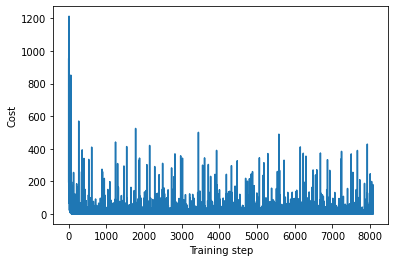

In [42]:
# Step 4: stochastic gradient descent
import matplotlib.pyplot as plt
import copy

# try different values for the learning rate
learning_rate = 0.01

# number of training iterations
num_samples = x_train_scaled.shape[0]
N_iterations = num_samples * 20 # loop over the training dataset 20 times

# prepare to plot
plt.subplot(111)

# calculate cost value and update theta
J = np.zeros(N_iterations)

# initialize new parameters using random distribution
theta_sgd = 0.5 * np.random.randn(x_train_scaled.shape[1])

for step in range(N_iterations):
    if step % num_samples == 0:
        # shuffle the training data (must be done the same way for data and targets)
        indices = np.random.permutation(num_samples)
        x_train_scaled = x_train_scaled[indices,:]
        y_train = y_train[indices]

    # select the next sample to train
    x_step = x_train_scaled[step%num_samples]
    y_step = y_train[step%num_samples]
    x_step = x_step.reshape([1,-1])

    # calculate the cost on x_step and y_step
    J[step] =  compute_cost(x_step, y_step, theta_sgd)

    # update theta using a x_step and y_step
    theta_sgd =  theta_sgd - learning_rate*compute_gradient(x_step, y_step, theta_sgd)

# calculate the loss on the whole training set 
J_train =  compute_cost(x_train_scaled, y_train, theta_sgd)
print('training cost: %f' %J_train)
# plot cost function
plt.plot(J)
plt.xlabel('Training step')
plt.ylabel('Cost')
plt.show()

test cost:  10.856019554118546


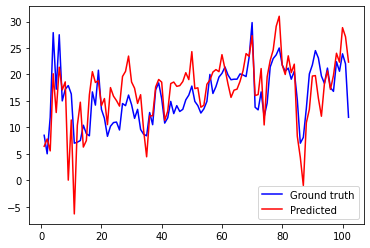

In [43]:
# Step 5
# Predict the price of house
predict_price =  np.dot(x_test_scaled, theta_sgd)

# calculate the cost for the test set
test_cost =  compute_cost(x_test_scaled, y_test, theta_sgd)
print('test cost: ',test_cost)

# plot the ground truth and the prediction
x_axis = np.linspace(1,len(y_test),len(y_test))
plt.plot(x_axis,y_test,'b',x_axis,predict_price,'r')
plt.legend(('Ground truth','Predicted'))
plt.show()

training cost: 11.753372


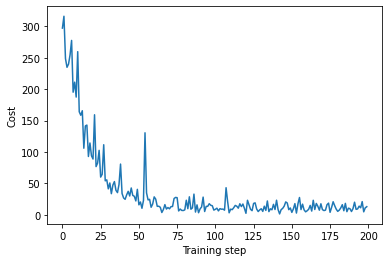

In [44]:
# Step 6: mini-batch gradient descent
import matplotlib.pyplot as plt
import copy

# try different values for the learning rate
learning_rate = 0.03

# number of training iterations
num_samples = x_train_scaled.shape[0]
batch_size = int(num_samples/10)
N_iterations = int(num_samples / batch_size) * 20  # loop over the training dataset 20 times

# prepare to plot
plt.subplot(111)

# keep the cost value for each training step
J = np.zeros(N_iterations)

# initialize new parameters using random distribution
theta_msgd = 0.5 * np.random.randn(x_train_scaled.shape[1])

start = 0
end = 0
for step in range(N_iterations):
    # create a mini-batch of data to train on
    end = start + batch_size
    if end >= num_samples:
        end = num_samples
    # slice x_train_scaled and y_train from start to end 
    # to create training batch
    x_batch = x_train_scaled[start:end,:]
    y_batch = y_train[start:end]
    
    if end == num_samples:
        # shuffle the training data 
        indices = np.random.permutation(num_samples)
        x_train_scaled = x_train_scaled[indices,:]
        y_train = y_train[indices]
        
    start = 0 if end >= num_samples else end
    
    # calculate the cost on x_step and y_step
    J[step] =  compute_cost(x_batch, y_batch, theta_msgd)

    # update theta_msgd using a x_step and y_step
    theta_msgd =  theta_msgd - learning_rate*compute_gradient(x_batch, y_batch, theta_msgd)

# calculate the loss on the whole training set 
J_train =  compute_cost(x_train_scaled, y_train, theta_msgd)
print('training cost: %f' %J_train)
# plot cost function
plt.plot(J)
plt.xlabel('Training step')
plt.ylabel('Cost')
plt.show()

test cost:  13.38570697377877


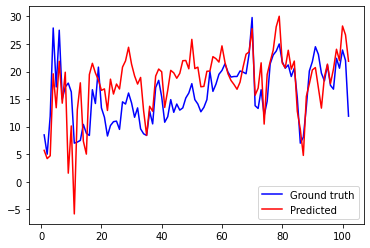

In [45]:
# Ste 7
# Predict the price of house
predict_price =  np.dot(x_test_scaled, theta_msgd)

# calculate the cost for the test set
test_cost =  compute_cost(x_test_scaled, y_test, theta_msgd)
print('test cost: ',test_cost)

# plot the ground truth and the prediction
x_axis = np.linspace(1,len(y_test),len(y_test))
plt.plot(x_axis,y_test,'b',x_axis,predict_price,'r')
plt.legend(('Ground truth','Predicted'))
plt.show()